In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\train.csv')
test = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\test.csv')
submit = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\head_submit_sample.csv')

In [3]:
test.replace({'job': {'unknown':'blue-collar'}}, inplace=True)

#score列の作成
train['score'] = np.zeros(train.shape[0])


#個人ローン
#学習データ
loan_none = train.loc[train['loan'] == 'no']
index = loan_none.index.values
index = list(index)

for i in index:
    train.iloc[i,18] = 1
    


#住宅ローン
housing_none = train.loc[train['housing'] == 'no']
index = housing_none.index.values
index = list(index)

score_values = housing_none['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['housing']=='no','score'] = i



#債務不履行
default = train.loc[train['default'] == 'yes']


score_values = default['score'].values
score_values = score_values - 3
score_values = list(score_values)

for i in score_values:
    train.loc[train['default']=='yes','score'] = i





#経営者
management = train.loc[train['job'] == 'management']


score_values = management['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='management','score'] = i
    


#管理者
admin = train.loc[train['job'] == 'admin.']


score_values = admin['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='admin.','score'] = i
    



#学生
student = train.loc[train['job'] == 'student']


score_values = student['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='student','score'] = i
    




#失業者
unemployed = train.loc[train['job'] == 'unemployed']


score_values = unemployed['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='unemployed','score'] = i
    
train.loc[train['job'] == 'unemployed']




#定年退職者
retired = train.loc[train['job'] == 'retired']


score_values = retired['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    train.loc[train['job']=='retired','score'] = i
    

In [4]:
#テストデータ
#score列の作成
test['score'] = np.zeros(test.shape[0])

#個人ローン
loan_none = test.loc[test['loan'] == 'no']
index = loan_none.index.values
index = list(index)

for i in index:
    test.iloc[i,17] = 1



#住宅ローン
housing_none = test.loc[test['housing'] == 'no']

score_values = housing_none['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['housing']=='no','score'] = i



#債務不履行
default = test.loc[test['default'] == 'yes']


score_values = default['score'].values
score_values = score_values - 3
score_values = list(score_values)

for i in score_values:
    test.loc[test['default']=='yes','score'] = i





#経営者
management = test.loc[test['job'] == 'management']


score_values = management['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='management','score'] = i
    


#管理者
admin = test.loc[test['job'] == 'admin.']


score_values = admin['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='admin.','score'] = i
    



#学生
student = test.loc[test['job'] == 'student']


score_values = student['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='student','score'] = i
    




#失業者
unemployed = test.loc[test['job'] == 'unemployed']


score_values = unemployed['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='unemployed','score'] = i
    



#定年退職者
retired = test.loc[test['job'] == 'retired']


score_values = retired['score'].values
score_values = score_values + 1
score_values = list(score_values)

for i in score_values:
    test.loc[test['job']=='retired','score'] = i
    

In [5]:
over_20 = train['age'].values
over_20 = over_20 - 20 


over_20_test = test['age'].values
over_20_test = over_20_test - 20 


an_income = over_20 * train['balance'].values


an_income_test = over_20_test * test['balance'].values

train['an_income'] = an_income
test['an_income'] = an_income_test

In [6]:
previous = train['previous'].values
duration = train['duration'].values
pre_total_duration = previous * duration
train['pre_total_duration'] = pre_total_duration


previous_test = test['previous'].values
duration_test = test['duration'].values
pre_total_duration_test = previous_test * duration_test
test['pre_total_duration'] = pre_total_duration_test

In [7]:
train_x = train.iloc[:,1:17]
train_x['score'] = train['score']
train_x['an_income'] = train['an_income']
train_x['pre_total_duration'] = train['pre_total_duration']
train_y = train['y']
test_x = test.iloc[:,1:]

In [8]:
train_x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,score,an_income,pre_total_duration
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,1.0,135234,0
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,2.0,387243,0
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,2.0,183780,0
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0.0,1090331,0
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,3.0,1176140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown,1.0,453237,0
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown,1.0,632250,0
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown,2.0,517965,0
27098,30,admin.,single,secondary,no,99621,yes,no,cellular,27,may,121,1,100,0,unknown,2.0,996210,0


In [8]:
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']
#LabelEncording
for c in cat_cols:
    le = LabelEncoder()
    le.fit(train[c])
    train_x[c] = le.transform(train[c])
    test_x[c] = le.transform(test[c])

In [10]:
#cat_cols = ['education','housing','month','poutcome']

#TargetEncording
#TargetEncording用のfoldに分割してTargetEncordingする方法    
#for c in cat_cols:
    #学習データのカテゴリカル変数のカラムごとの変数とtargetをデータフレームとする。
    #data_tmp = pd.DataFrame({c:train_x[c], 'target': train_y})
    #データフレームのカラムの要素ごとの平均を取る
    #target_mean = data_tmp.groupby(c)['target'].mean()
    #訓練データフレームの平均をテストデータに入れる。
    #test_x.loc[:,c] = test_x[c].map(target_mean)
    
    #訓練データを入れるための空の箱を作る
    #tmp = np.repeat(np.nan, train_x.shape[0])
    
    
    #one of out holdで一つ一つのバリデーションに平均値を入れていく
    #kf =  KFold(n_splits=4, shuffle=True, random_state=71)
    #for idx_1, idx_2 in kf.split(train_x):
        
       #target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
        
        #tmp[idx_2] = train_x[c].iloc[idx_2].map(target_mean)
        
    #train_x[c] = tmp

In [20]:
#hold out 法
scaler = StandardScaler()
scaler.fit_transform(train_x)
scaler.fit_transform(test_x)

kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]
tr_x,va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y,va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx] 


In [21]:
d_train = xgb.DMatrix(tr_x, label=tr_y)
d_valid = xgb.DMatrix(va_x, label=va_y)

params = {'objective':'binary:logistic','silent':1, 'random_state':71, 'eta':0.1}

num_round = 500

watchilist = [(d_train,'train'),(d_valid,'eval')]

model = xgb.train(params,d_train, num_round, evals = watchilist, early_stopping_rounds=20 )

val_pred = model.predict(d_valid, ntree_limit = model.best_ntree_limit)

score = log_loss(va_y,val_pred)
print(score)

[15:00:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.06799	eval-error:0.07055
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.06824	eval-error:0.07041
[2]	train-error:0.06760	eval-error:0.07070
[3]	train-error:0.06819	eval-error:0.07026
[4]	train-error:0.06716	eval-error:0.07011
[5]	train-error:0.06770	eval-error:0.06922
[6]	train-error:0.06731	eval-error:0.06937
[7]	train-error:0.06750	eval-error:0.06937
[8]	train-error:0.06741	eval-error:0.06967
[9]	train-error:0.06735	eval-error:0.06922
[10]	train-error:0.06701	eval-error:0.068

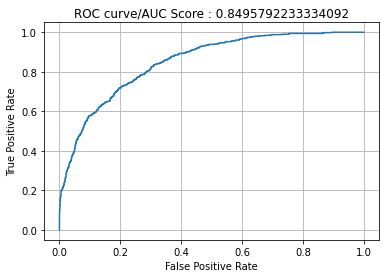

In [22]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(va_y,val_pred)
auc_score = roc_auc_score(va_y,val_pred)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

In [82]:
# 重要度の上位を出力する
fscore = model.get_score(importance_type ='total_gain')
fscore = sorted([ (k, v ) for k, v in fscore.items()], key = lambda tpl: [1], reverse=True)
print('xgboost immportance')
print(fscore[:5])

xgboost immportance
[('previous', 1255.8277371390002), ('housing', 2288.093957472001), ('month', 2717.5519102619996), ('poutcome', 3099.5697776170005), ('education', 365.1954982590002)]


In [85]:
#データのｙを求める
d_test = xgb.DMatrix(test_x)


test_pred = model.predict(d_test, ntree_limit=model.best_ntree_limit)

In [86]:
id = test['id']
test_pred = pd.Series(test_pred)
pred = test_pred

submit = pd.concat([id,pred], axis=1)
submit.columns = ['id', 'y']
submit

,id,y
0,0,0.718612
1,1,0.087817
2,2,0.022825
3,3,0.003575
4,4,0.042037
...,...,...
18045,18045,0.010842
18046,18046,0.012852
18047,18047,0.105116
18048,18048,0.004204


In [87]:
submit.to_csv('xgboost_best.csv',index=False,header=False)

In [ ]:
train_x.to_csv('train_x_xgboost.csv',index=False)
train_y.to_csv('train_y_xgboost.csv',index=False)
test_x.to_csv('test_x_xgboost.csv',index=False)

# ハイパーパラメータのチューニング

In [9]:
scaler = StandardScaler()
scaler.fit_transform(train_x)
scaler.fit_transform(test_x)

kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]
tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

array([[-0.14042776,  1.4454851 ,  1.45235137, ...,  0.6128679 ,
         0.85068028,  1.47293149],
       [ 0.1139091 ,  0.83693432, -0.30268259, ..., -0.93690313,
         0.49385981, -0.14553211],
       [-0.64910149,  0.83693432,  1.45235137, ..., -0.93690313,
        -0.61015874, -0.14553211],
       ...,
       [-0.2675962 , -1.2929934 ,  1.45235137, ...,  0.6128679 ,
         0.82701507, -0.14553211],
       [-0.64910149,  1.4454851 ,  1.45235137, ..., -0.93690313,
        -0.05915788, -0.14553211],
       [-0.77626992,  0.22838354, -0.30268259, ...,  2.16263893,
        -1.02849692, -0.14553211]])

In [16]:
import xgboost as xgb


#モデルの定義
class Model:
    
    def __init__(self,params=None):
        self.params = None
        if params is None:
            self.params = {}
        else :
            self.params = params
            
    def fit(self, tr_x, tr_y, va_x, va_y):
        params = {'booster':'gbtree',
          'objective':'binary:logistic',
          'silent':1,
          'random_state':71,
          'eta': 0.1,}
        params.update(self.params)
        num_round = 10
        dtrain = xgb.DMatrix(tr_x, label=tr_y)
        dvalid = xgb.DMatrix(va_x, label=va_y)
        watchilist = [(dtrain, 'train'), (dvalid, 'eval')]
        self.model = xgb.train(params, dtrain, num_round, evals =watchilist)
        
        
    def predict(self, x):
        data = xgb.DMatrix(x)
        pred = self.model.predict(data)
        return pred

In [17]:
from hyperopt import hp

from hyperopt import fmin, tpe, hp , STATUS_OK, Trials
from sklearn.metrics import log_loss

def score(params) :
    
    params['max_depth'] = int(params['max_depth'])
    
    model = Model(params)
    model.fit(tr_x, tr_y, va_x, va_y)
    va_pred = model.predict(va_x)
    score = log_loss(va_y, va_pred)
    print(f'params: {params}, logloss : {score : .4f}')
    
    history.append((params, score))
    
    return {'loss': score, 'status': STATUS_OK}



param_space = {
    'min_child_weight': hp.loguniform('min_child_weight', np.log(0.1), np.log(10)),
    'max_depth': hp.quniform('max_depth', 3, 9, 1),
    'subsample': hp.quniform('subsample', 0.6, 0.95, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 0.95, 0.05),
    'gamma': hp.loguniform('gamma', np.log(1e-8), np.log(1.0)),
    # 余裕があればalpha, lambdaも調整する
    'alpha' : hp.loguniform('alpha', np.log(1e-8), np.log(1.0)),
    'lambda' : hp.loguniform('lambda', np.log(1e-6), np.log(10.0)),
}



max_evals = 10
trials = Trials()
history = []
fmin(score, param_space, algo=tpe.suggest, trials=trials, max_evals = max_evals)


history = sorted(history, key=lambda tpl: tpl[1])
best = history[0]
print(f'best params : {best[0]}, score:{best[1]:.4f}')

[14:58:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480:                   
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.07724	eval-error:0.07410                                                                             

[1]	train-error:0.07257	eval-error:0.06849                                                                             

[2]	train-error:0.07296	eval-error:0.06804                                                                             

[3]	train-error:0.07291	eval-error:0.06804                                                                             

[4]	train-error:0.07228	eval-error:0.06790                                                                        

[9]	train-error:0.06652	eval-error:0.06701                                                                             

params: {'alpha': 1.874078627415234e-05, 'colsample_bytree': 0.8500000000000001, 'gamma': 0.1875049396076286, 'lambda': 6.534946004068537, 'max_depth': 8, 'min_child_weight': 0.8402257967873807, 'subsample': 0.75}, logloss :  0.3270
[14:58:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480:                   
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.07262	eval-error:0.06922                                                                             

[1]	train-error:0.07242	eval-error:0.06790                                                                             

[2

In [18]:
d_train = xgb.DMatrix(tr_x, label=tr_y)
d_valid = xgb.DMatrix(va_x, label=va_y)

params = {'objective':'binary:logistic','silent':1, 'random_state':71, 'eta':0.1,
         'alpha': 0.0003595462667444797,'colsample_bytree': 0.8,
          'gamma': 0.03280399314969842,'lambda': 0.35199860793869975,
         'max_depth': 7,'min_child_weight': 5.189327191467295,
         'subsample': 0.8500000000000001}

num_round = 500

watchilist = [(d_train,'train'),(d_valid,'eval')]

model = xgb.train(params,d_train, num_round, evals = watchilist, early_stopping_rounds=20 )

val_pred = model.predict(d_valid, ntree_limit = model.best_ntree_limit)

score = log_loss(va_y,val_pred)
print(score)

[15:00:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.06922	eval-error:0.07100
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.06888	eval-error:0.06967
[2]	train-error:0.06962	eval-error:0.06804
[3]	train-error:0.06898	eval-error:0.06731
[4]	train-error:0.06809	eval-error:0.06701
[5]	train-error:0.06927	eval-error:0.06613
[6]	train-error:0.06903	eval-error:0.06598
[7]	train-error:0.06844	eval-error:0.06613
[8]	train-error:0.06819	eval-error:0.06627
[9]	train-error:0.06775	eval-error:0.06583
[10]	train-error:0.06775	eval-error:0.065

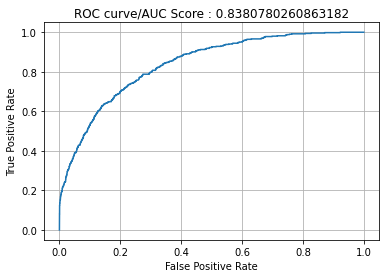

In [19]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(va_y,val_pred)
auc_score = roc_auc_score(va_y,val_pred)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)